# 1. 데이터 불러오기 + Resize 하기   

## 데이터를 준비하자

In [192]:
from PIL import Image
import glob
import matplotlib.pyplot as plt

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [193]:
def resize_images(img_path):
    images = glob.glob(img_path + "/*.png")
    
    print(len(images), " images to be resized.")
    
    # 파일마다 모두 28X28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "png")
    
    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

750  images to be resized.
750  images resized.
가위 이미지 resize 완료!


In [194]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./rock_scissor_paper/rock"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

750  images to be resized.
750  images resized.


In [195]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./rock_scissor_paper/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

750  images to be resized.
750  images resized.


In [196]:
import numpy as np

def load_data(img_path, number_of_data=2250): # 가위 바위 보 이미지 개수 총합에 주의하세요.
    # 가위:0, 바위: 1, 보: 2
    img_size = 28
    color = 3
    # 이미지 데이터와 라벨(가위: 0, 바위: 1, 보: 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype = np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype = np.int32)
    
    idx = 0
    for file in glob.iglob(img_path + '/scissor/*.png'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx, :, :, :] = img # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 0 # 가위: 0
        idx = idx + 1
    
    for file in glob.iglob(img_path + '/rock/*.png'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx, :, :, :] = img # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 1 # 바위: 1
        idx = idx + 1
    
    for file in glob.iglob(img_path + '/paper/*.png'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx, :, :, :] = img # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 2 # 보: 2
        idx = idx + 1
    
    print("학습 데이터(x_train)의 이미지 개수는", idx, "입니다.")
    return imgs, labels

image_dir_path = "./rock_scissor_paper"
(x_train, y_train) = load_data(image_dir_path)
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))
# 최소값: 0  최대값: 213
# 입력은 0~1 사이의 값으로 정규화
x_train_norm = x_train / 213.0

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습 데이터(x_train)의 이미지 개수는 2250 입니다.
최소값: 0  최대값: 255
x_train shape: (2250, 28, 28, 3)
y_train shape: (2250,)


라벨:  0


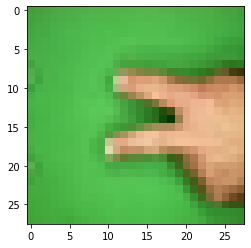

In [209]:
plt.imshow(x_train[100])
print('라벨: ', y_train[100])

라벨:  0


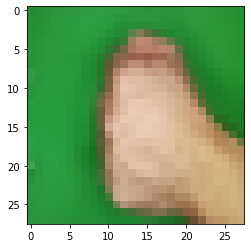

In [198]:
plt.imshow(x_train[800])
print('라벨: ', y_train[100])

라벨:  0


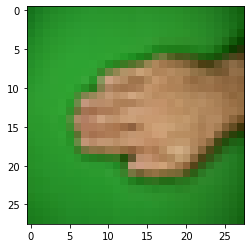

In [199]:
plt.imshow(x_train[1600])
print('라벨: ', y_train[200])

## 2. 딥러닝 네트워크 설계하기

### Sequential Model을 사용해 보자

In [200]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))


print(len(model.layers))
model.summary()

7
Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_154 (Conv2D)          (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_154 (MaxPoolin (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_155 (Conv2D)          (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_155 (MaxPoolin (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_77 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_154 (Dense)            (None, 32)                25632     
_________________________________________________________________
dense_155 (Dense)            (None, 3)             

## 3. 딥러닝 네트워크 학습시키기

In [201]:
# model을 학습시키는 코드를 직접 작성해 보세요.
print(x_train_norm.shape)

x_train_reshaped = x_train_norm.reshape( -1, 28, 28, 3)

print(x_train_reshaped.shape)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs=10)

(2250, 28, 28, 3)
(2250, 28, 28, 3)
Epoch 1/10
71/71 [==============================] - 2s 8ms/step - loss: 0.7609 - accuracy: 0.7138
Epoch 2/10
71/71 [==============================] - 1s 11ms/step - loss: 0.3582 - accuracy: 0.8836
Epoch 3/10
71/71 [==============================] - 1s 8ms/step - loss: 0.1915 - accuracy: 0.9431
Epoch 4/10
71/71 [==============================] - 1s 8ms/step - loss: 0.1186 - accuracy: 0.9680
Epoch 5/10
71/71 [==============================] - 1s 12ms/step - loss: 0.1067 - accuracy: 0.9644
Epoch 6/10
71/71 [==============================] - 1s 14ms/step - loss: 0.0770 - accuracy: 0.9769
Epoch 7/10
71/71 [==============================] - 1s 7ms/step - loss: 0.0642 - accuracy: 0.9773: 0s - loss: 0.0632 
Epoch 8/10
71/71 [==============================] - 1s 8ms/step - loss: 0.0524 - accuracy: 0.9836
Epoch 9/10
71/71 [==============================] - 1s 9ms/step - loss: 0.0465 - accuracy: 0.9862
Epoch 10/10
71/71 [==============================] - 1s 8ms

## 4. test 만들기

In [202]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./rock_scissor_paper/test/scissor"
resize_images(image_dir_path)
image_dir_path = "./rock_scissor_paper/test/rock"
resize_images(image_dir_path)
image_dir_path = "./rock_scissor_paper/test/paper"
resize_images(image_dir_path)
print("이미지 resize 완료!")

print("-"*40)

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "./rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
# 입력은 0~1 사이의 값으로 정규화
x_test_norm = x_test/213.0

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

print("-"*40)

print(x_test_norm.shape)

x_test_reshaped = x_test_norm.reshape( -1, 28, 28, 3)

print(x_test_reshaped.shape)

#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.fit(x_test_reshaped, y_test, epochs=10)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
이미지 resize 완료!
----------------------------------------
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)
----------------------------------------
(300, 28, 28, 3)
(300, 28, 28, 3)


## 5. 얼마나 잘 만들었는지 확인하기

### 테스트 데이터로 성능을 확인해 보자

In [203]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 2.0584 - accuracy: 0.6667
test_loss: 2.058405876159668
test_accuracy: 0.6666666865348816


# 6. 어떤 데이터를 잘못 추론했을까? 눈으로 확인해 보자

In [204]:
predicted_result = model.predict(x_test_reshaped) # model이 추론한 확률값.
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  # 1번째 x_test를 살펴보자.
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.00333638 0.00863399 0.98802966]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


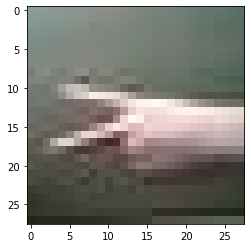

In [205]:
plt.imshow(x_test[idx], cmap=plt.cm.binary)
plt.show()

예측확률분포: [2.0318644e-04 3.3375945e-02 9.6642095e-01]
라벨: 0, 예측결과: 2


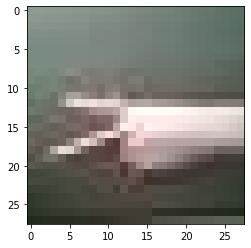

예측확률분포: [0.00333638 0.00863399 0.98802966]
라벨: 0, 예측결과: 2


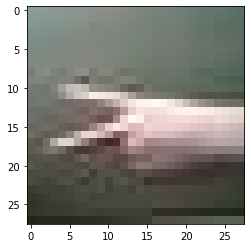

예측확률분포: [7.3087562e-05 1.0273916e-01 8.9718777e-01]
라벨: 0, 예측결과: 2


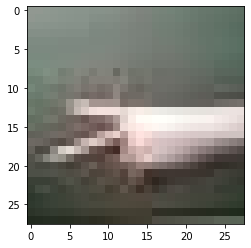

예측확률분포: [9.2606369e-04 1.1300415e-02 9.8777348e-01]
라벨: 0, 예측결과: 2


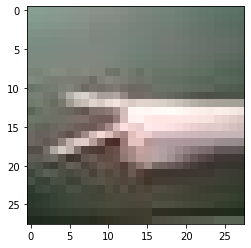

예측확률분포: [2.4262935e-04 2.2662425e-02 9.7709489e-01]
라벨: 0, 예측결과: 2


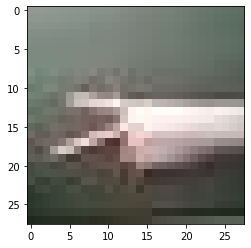

In [206]:
import random
wrong_predict_list = []
for i, _ in enumerate(predicted_labels):
	# i번째 test_labels과 y_test이 다른 경우만 모아 봅시다.
	if predicted_labels[i] != y_test[i]:
		wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
	print("예측확률분포: " + str(predicted_result[n]))
	print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
	plt.imshow(x_test[n], cmap=plt.cm.binary)
	plt.show()

train 데이터와 test의 손가락 모양 차이일까요? 유독 가위에서 문제가 있네요.

# 7. 더 좋은 네트워크 만들어 보기

In [207]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1 = 16
n_channel_2 = 32
n_dense = 32
n_train_epoch = 10

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_156 (Conv2D)          (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_156 (MaxPoolin (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_157 (Conv2D)          (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_157 (MaxPoolin (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_78 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_156 (Dense)            (None, 32)                25632     
_________________________________________________________________
dense_157 (Dense)            (None, 3)               

4개의 파라미터를 계속 건드려봤지만 값을 높인다고 잘나오는건 아닌거 같아서 크게 건드리지 않았습니다.  
대신 train 여러 데이터를 추가했고, test 에서 배경에 다른 그림들이 같이 잡혀서 정확도가 떨어지는것 같아서 최대한 깔끔하게 찍어보았습니다.

## 시각화

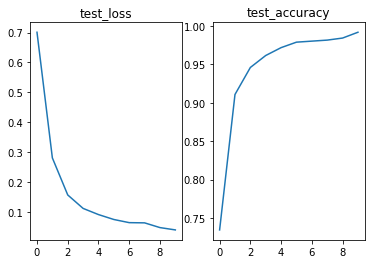

In [208]:
plt.subplot(121)
plt.title('test_loss')
plt.plot(history.history['loss'], label='test')
plt.subplot(122)
plt.title('test_accuracy')
plt.plot(history.history['accuracy'], label='test')
plt.show()

# 회고

처음에 모델의 하이퍼 파라미터를 잘 조절한다면 어느정도 성능의 개선이 있을 줄 알았지만 그렇지 않았고,  
학습의 정확도나 오버피팅을 방지하는것에는 다양한 데이터를 추가하는게 큰 영향을 미친다는것을 알게되었습니다.  
데이터 정규화를 할때도 처음에는 이전의 예제처럼 255로 나누었다가 천천히 다시한번 읽어보니 해당 데이터는 213으로 고쳐야한다는 것을 뒤늦게 알게되었고,
이미지 인식이 수월하게 되기위해 배경의 색감이나 이미지에 신경써야함을 알게되었습니다.
데이터가 더 많이 있다면 덜 신경써도 잘 인식이 되는지 테스트를 못해본게 좀 아쉽습니다.